## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# EDA

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import sklearn
from sklearn import preprocessing
%matplotlib inline

## King County Data

In [969]:
# explore the data
df = pd.read_csv('data/kc_house_data.csv')
df2 = pd.read_csv('data/middle_school_hd.csv')

In [970]:
# check all the dtype is numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [971]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [972]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [973]:
df2.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,HubName,HubDist
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6374.645877,1.264706
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,621.799657,1.049036
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5103.000000,0.020115
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,5893.000000,0.689758
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6399.000000,1.069560
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6827.000000,1.588646
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7592.000000,24.952758


In [974]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,HubName,HubDist
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,6219,1.750332
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,False,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7170,1.440778
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,False,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,5516,1.243018
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,False,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,6214,1.473385
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,5338,0.687628


## Data Cleaning

In [975]:
# drop NaN
cleaned_df = df.dropna()

In [976]:
# sqft_basement is not categorical varibale but have to change dtype to float.
cleaned_df.sqft_basement.value_counts()

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
2010.0       1
1481.0       1
1913.0       1
4820.0       1
248.0        1
Name: sqft_basement, Length: 283, dtype: int64

In [977]:
# sqft_basement have '?' value that is string. I drop '?' values.
cleaned_df = cleaned_df.loc[cleaned_df.sqft_basement != '?']
cleaned_df.sqft_basement = cleaned_df.sqft_basement.astype('float')

In [978]:
# drop NaN
cleaned_df2 = df2.dropna()

# Data Analysis

## Correlation features with price

In [979]:
# import library
import matplotlib.pyplot as plt
%matplotlib inline

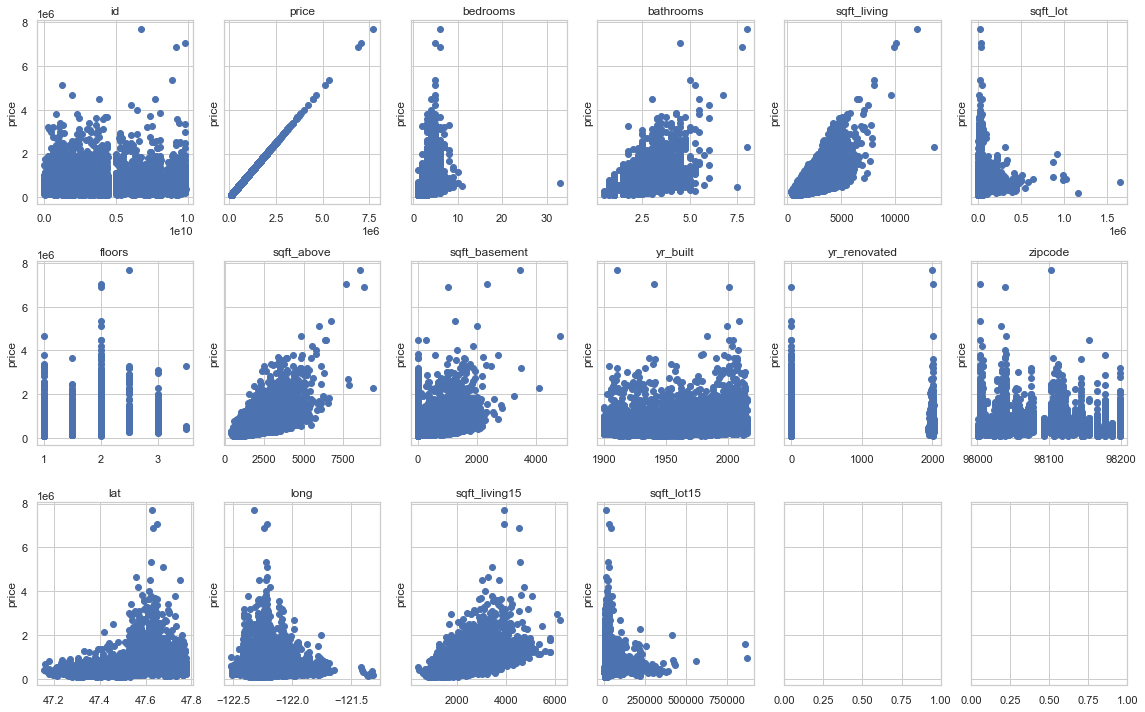

In [980]:
# plot categorical variables with price

fig, axes = plt.subplots(nrows=3, ncols=6, figsize = (16, 10), sharey = True)

continous = [cont for cont in cleaned_df.select_dtypes(exclude=['object'])]

for col, ax in zip(continous, axes.flatten()):
    ax.scatter(cleaned_df[col], cleaned_df['price'])
    ax.set_ylabel('price')
    ax.set_title(col)
fig.tight_layout()

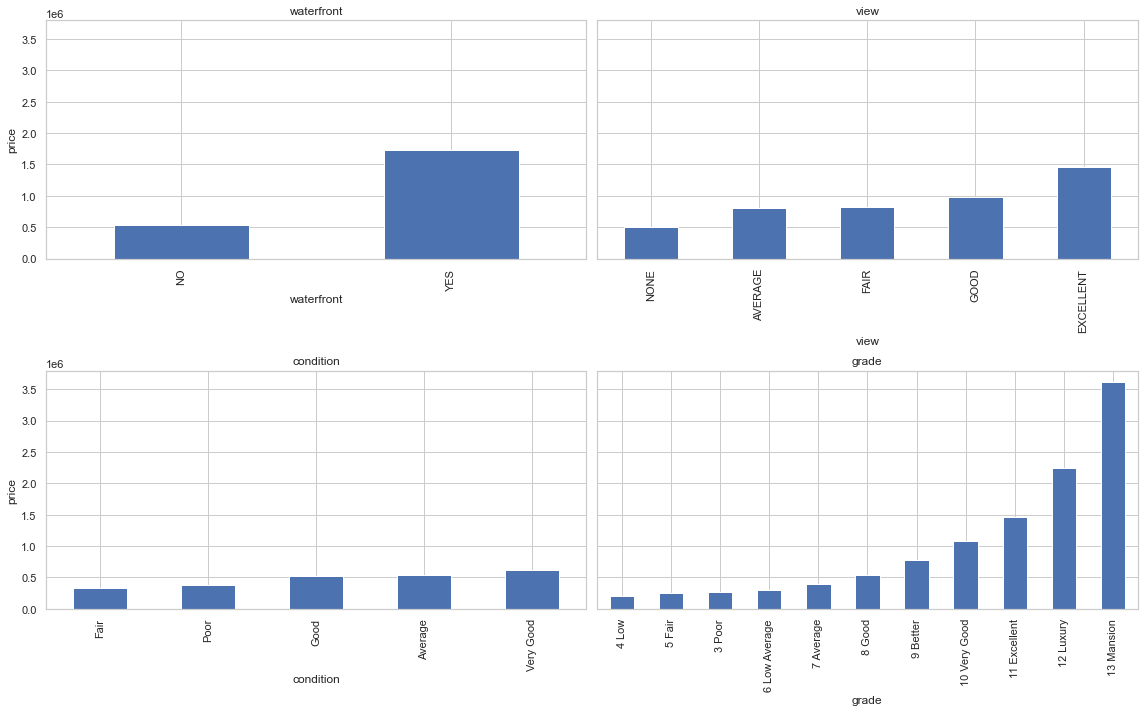

In [981]:
# plot categorical variables with price except date

fig, axes2 = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10), sharey = True)

categoricals = ['waterfront', 'view', 'condition', 'grade']

for col, ax in zip(categoricals, axes2.flatten()):
    cleaned_df.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax)
    ax.set_ylabel('price')
    ax.set_title(col)
fig.tight_layout()

# Feature Engineering

## Preprocess Train Data

In [982]:
# preprocessing with scikit-learn
y = cleaned_df['price']
X = cleaned_df.drop('price', axis=1)

In [983]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [984]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 11571 rows and 20 columns
y_train is a Series with 11571 values


In [985]:
# Select relevant Columns
relevant_columns = ['bathrooms',
                    'bedrooms',
                    'sqft_living',
                    'waterfront',
                    'view',
                    'condition',
                    'grade',
                    'sqft_basement',
                    'lat',
                    'floors',
                    'sqft_above'
                    ]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[:, relevant_columns]

In [986]:
X_train.isna().sum()

bathrooms        0
bedrooms         0
sqft_living      0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
lat              0
floors           0
sqft_above       0
dtype: int64

In [987]:
# Convert Categorical Features into Numbeers
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11571 entries, 560 to 10173
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      11571 non-null  float64
 1   bedrooms       11571 non-null  int64  
 2   sqft_living    11571 non-null  int64  
 3   waterfront     11571 non-null  object 
 4   view           11571 non-null  object 
 5   condition      11571 non-null  object 
 6   grade          11571 non-null  object 
 7   sqft_basement  11571 non-null  float64
 8   lat            11571 non-null  float64
 9   floors         11571 non-null  float64
 10  sqft_above     11571 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.1+ MB


In [988]:
# date, waterfront, view, condition, and grade are objects
from sklearn.preprocessing import OrdinalEncoder

In [989]:
# waterfront transform
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder(categories=[['NO', 'YES']])
encoder_waterfront.fit(waterfront_train)
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
X_train['waterfront'] = waterfront_encoded_train

In [990]:
# view transform
view_train = X_train[['view']]
encoder_view = OrdinalEncoder(categories=[['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])
encoder_view.fit(view_train)
view_encoded_train = encoder_view.transform(view_train)
view_encoded_train = view_encoded_train.flatten()
X_train['view'] = view_encoded_train

In [991]:
# condition transform
condition_train = X_train[['condition']]
encoder_condition = OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good']])
encoder_condition.fit(condition_train)
condition_encoded_train = encoder_condition.transform(condition_train)
condition_encoded_train = condition_encoded_train.flatten()
X_train['condition'] = condition_encoded_train

In [992]:
# grade transform
grade_train = X_train[['grade']]
encoder_grade = OrdinalEncoder(categories=[['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']])
encoder_grade.fit(grade_train)
grade_encoded_train = encoder_grade.transform(grade_train)
grade_encoded_train = grade_encoded_train.flatten()
X_train['grade'] = grade_encoded_train

# Preprocess Test Data

In [993]:
# Drop Irrelevant Columns
X_test = X_test.loc[:, relevant_columns]

# Transform categorical values to numbers
# waterfront transform
waterfront_test = X_test[['waterfront']]
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test).flatten()
X_test['waterfront'] = waterfront_encoded_test
# view transform
view_test = X_test[['view']]
view_encoded_test = encoder_view.transform(view_test).flatten()
X_test['view'] = view_encoded_test
# condition transform
condition_test = X_test[['condition']]
condition_encoded_test = encoder_condition.transform(condition_test).flatten()
X_test['condition'] = condition_encoded_test
# grade transform
grade_test = X_test[['grade']]
grade_encoded_test = encoder_grade.transform(grade_test).flatten()
X_test['grade'] = grade_encoded_test

## Find Houses Near Middle School

(0.0, 1.5)

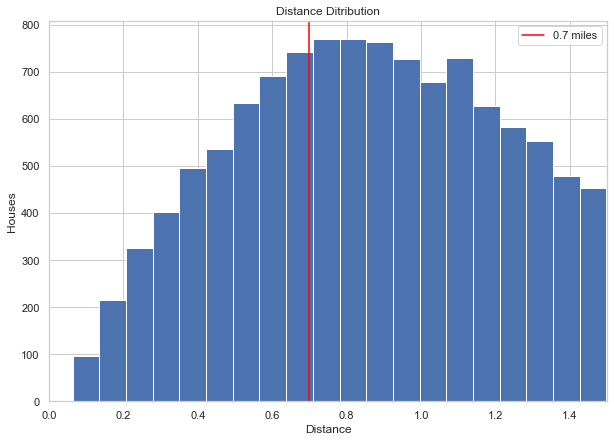

In [994]:
# visualize the hub distance
cleaned_df2.HubDist.hist(bins ='auto', figsize=(10,7))
plt.axvline(0.7, color='red', label='0.7 miles')
plt.title('Distance Ditribution')
plt.xlabel('Distance')
plt.ylabel('Houses')
plt.legend()
plt.xlim([0,1.5])

In [995]:
# drop houses' school disctance under 0.7 miles that is shown above
cleaned_df2 = cleaned_df2.loc[cleaned_df2.HubDist <= 0.7]
cleaned_df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,HubName,HubDist
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,5338,0.687628
11,9212900260,5/27/2014,468000,2,1.00,1160,6000,1.0,False,NONE,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,6260,0.544642
13,6054650070,10/7/2014,400000,3,1.75,1370,9680,1.0,False,NONE,...,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208,5338,0.651845
17,6865200140,5/29/2014,485000,4,1.00,1600,4300,1.5,False,NONE,...,0.0,1916,0.0,98103,47.6648,-122.343,1610,4300,5676,0.559904
19,7983200060,4/24/2015,230000,3,1.00,1250,9774,1.0,False,NONE,...,0.0,1969,0.0,98003,47.3343,-122.306,1280,8850,6399,0.576901


# Modeling and Evaluation

## House Price Prediction Modeling

In [996]:
# Model define
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [997]:
# Evaluation with cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train**2, y_train, cv=5)

array([0.75132775, 0.69063972, 0.64892535, 0.72535465, 0.73110131])

In [998]:
# Evaluation with test set
model.fit(X_train**2, y_train)
model.score(X_test**2, y_test)

0.7150335566536903

## Prediction

In [999]:
# Get total data
y_total = pd.concat([y_test, y_train]).sort_index()
X_total = pd.concat([X_test, X_train]).sort_index()

# Predict price
pred = model.predict(X_total**2).round()

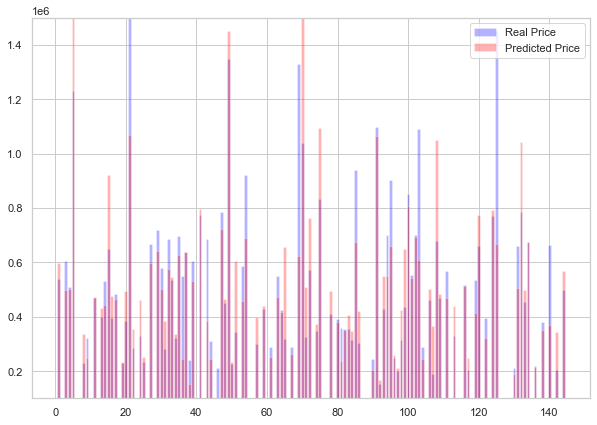

In [1000]:
# Visualize the real data with predicted data
fig = plt.figure(figsize=(10,7))
plt.bar(X_total.index[:100], y_total[:100], color='blue', alpha=0.3, label='Real Price')
plt.bar(X_total.index[:100], pred[:100], color='red', alpha=0.3, label='Predicted Price')
plt.legend()
plt.ylim([100000, 1500000])
plt.show()

## Apply to Business Problem

In [1001]:
# Find houses that is under the 60% price that AI predicted
cleaned_df['predict_price'] = pred
results_df = cleaned_df.loc[cleaned_df.price < cleaned_df.predict_price*0.6, ['id', 'price', 'predict_price', 'lat', 'long']]
results_df

,id,price,predict_price,lat,long
51,7231300125,345000.0,604994.0,47.4934,-122.189
65,3253500160,317625.0,656787.0,47.5747,-122.304
107,3530510041,188500.0,367002.0,47.3813,-122.322
142,1432900240,205000.0,345225.0,47.4563,-122.171
194,3996900125,230000.0,439855.0,47.7481,-122.300
...,...,...,...,...,...
21211,2738640470,623300.0,1207573.0,47.7726,-122.162
21263,6056110780,229800.0,405694.0,47.5647,-122.293
21347,3782760080,410000.0,689145.0,47.7345,-121.967
21420,1608000120,255000.0,430354.0,47.3860,-122.184


In [1007]:
# Visualize all houses

import folium

map1 = folium.Map(location=[47.5,-122])
points = (results_df.lat, results_df.long)
lat = points[0]
long = points[1]

for la, lo, real, pred in zip(lat, long, results_df.price, results_df.predict_price):
    iframe = folium.IFrame('price: ${} predict: ${}'.format(real, pred), width=100, height=100)
    popup = folium.Popup(iframe, max_width=100)
    folium.Marker(location=[la,lo],popup=popup).add_to(map1)
    
map1

SyntaxError: invalid syntax (3256890227.py, line 2)

In [1004]:
# Visualize houses that is near middle school
results_df = results_df.join(cleaned_df2, how='inner', lsuffix='index')
map2 = folium.Map(location=[47.5,-122])
points = (results_df.lat, results_df.long)
lat = points[0]
long = points[1]

for la, lo, real, pred in zip(lat, long, results_df.price, results_df.predict_price):
    iframe = folium.IFrame('price: ${} predict: ${}'.format(real, pred), width=100, height=100)
    popup = folium.Popup(iframe, max_width=100)
    folium.Marker(location=[la,lo],popup=popup).add_to(map2)

NameError: name 'folium' is not defined

In [1008]:
map2

NameError: name 'map2' is not defined

In [1009]:
results_df

,idindex,priceindex,predict_price,latindex,longindex,id,date,price,bedrooms,bathrooms,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,HubName,HubDist
194,3996900125,230000.0,439855.0,47.7481,-122.300,3996900125,12/1/2014,230000,3,1.00,...,0.0,1948,0.0,98155,47.7481,-122.300,1570,10228,5822,0.203899
239,5152100060,472000.0,894452.0,47.3376,-122.324,5152100060,5/29/2014,472000,6,2.50,...,2060.0,1965,0.0,98003,47.3376,-122.324,2600,13988,6399,0.352748
979,8899200570,280000.0,495536.0,47.4545,-122.208,8899200570,3/11/2015,280000,3,2.25,...,510.0,1977,0.0,98055,47.4545,-122.208,1730,7800,6937,0.523018
1127,8062900070,272000.0,477968.0,47.5014,-122.172,8062900070,9/9/2014,272000,5,1.50,...,990.0,1959,0.0,98056,47.5014,-122.172,1380,6300,6827,0.621588
1158,1865810060,267500.0,454241.0,47.3737,-122.115,1865810060,8/12/2014,267500,5,3.50,...,0.0,1977,0.0,98042,47.3737,-122.115,1140,6600,6810,0.406896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20791,6056100160,182568.0,332076.0,47.5669,-122.297,6056100160,7/28/2014,182568,4,1.50,...,0.0,2014,0.0,98108,47.5669,-122.297,1490,2175,6850,0.694246
20924,1823059241,609000.0,1121537.0,47.4880,-122.225,1823059241,4/8/2015,609000,4,3.50,...,1060.0,2007,0.0,98055,47.4880,-122.225,1980,11328,6219,0.444095
20947,6058600220,230000.0,542564.0,47.5951,-122.301,6058600220,7/31/2014,230000,3,1.50,...,140.0,2015,0.0,98144,47.5951,-122.301,1350,3000,5103,0.249130
21420,1608000120,255000.0,430354.0,47.3860,-122.184,1608000120,2/2/2015,255000,3,2.50,...,0.0,2006,0.0,98031,47.3860,-122.184,2844,5769,6854,0.434644


# Conclusion

### The house price prediction model has 71.5% of precision. \ The model recommend 507 houses that are 40% lower price from predicted price. \ We consider that he has a middle school child. We considered the distance from middle schools. \ Now, we can suggest 100 houses that are significantly profitable houses